In [1]:
!pip install pandas==0.22.0
!pip install numpy==1.14.6
!pip install matplotlib==2.1.2

▲库的版本变更

In [2]:
import sys
import pandas
import numpy
import matplotlib
print('python version : ', sys.version_info[0:3])
print('pandas version : ', pandas.__version__)
print('numpy version : ', numpy.__version__)
print('matplotlib version : ', matplotlib.__version__)


python version :  (3, 6, 9)
pandas version :  0.22.0
numpy version :  1.14.6
matplotlib version :  2.1.2


▲Python和库的版本输出

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


▲预先执行的代码

In [0]:
import urllib
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/'
zfile = 'bank-additional.zip'
request = urllib.request.urlopen(url + zfile)

▲程序清单 9.36 urllib 模块的 request.urlopen 函数

In [5]:
import io, zipfile
file = zipfile.ZipFile(io.BytesIO(request.read()))
file

<zipfile.ZipFile file=<_io.BytesIO object at 0x7fb3ce1ecf68> mode='r'>

▲ 程序清单 9.37 io 模块和 zipfile 模块

In [0]:
cfile = 'bank-additional/bank-additional-full.csv'
df = pd.read_csv(file.extract(cfile), sep=';', engine='python')

▲ 程序清单 9.38 read_csv 函数

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(41188, 21)

▲ 程序清单 9.39 head 方法和 shape 属性

In [9]:
use_cols = ['age','job','marital','education','default','housing',
            'contact','month','day_of_week','duration','campaign','y']
df = df[use_cols].copy()
df.shape

(41188, 12)

▲程序清单 9.40 删除不需要的列

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
age            41188 non-null int64
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
duration       41188 non-null int64
campaign       41188 non-null int64
y              41188 non-null object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


▲ 程序清单 9.41 DataFrame 对象的 info 方法

In [11]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
y              0
dtype: int64

▲ 程序清单 9.42 isna 方法和 sum 方法

In [12]:
df.duplicated().sum()

20

▲ 程序清单 9.43 duplicated 方法和 sum 方法

In [13]:
df[df.duplicated(keep=False)][0:2]

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,y
1265,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,no
1266,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,no


▲ 程序清单 9.44 duplicated 方法和引用

In [14]:
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)

(41168, 12)


▲ 程序清单 9.45 drop_duplicates 方法

In [15]:
df['job'].value_counts()

admin.           10418
blue-collar       9250
technician        6736
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1420
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

▲ 程序清单 9.46 Series 对象的 value_counts 方法

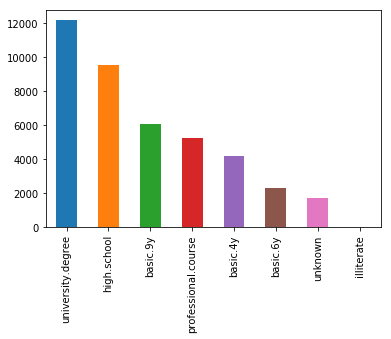

In [16]:
df['education'].value_counts().plot(kind='bar')

▲程序清单 9.47 value_counts 方法和 plot 方法（kind='bar'）

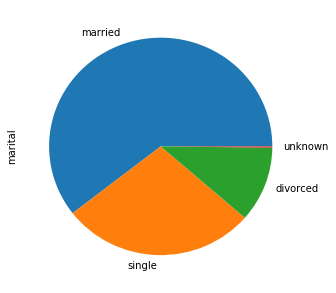

In [17]:
df['marital'].value_counts().plot(kind='pie', figsize=(5,5))

▲程序清单 9.48 value_counts 方法和 plot 方法（kind='pie'）

In [18]:
cnt = df[['default','housing','y']].apply(pd.Series.value_counts)
cnt

,default,housing,y
no,32570,18612,36529.0
unknown,8595,990,NaN
yes,3,21566,4639.0


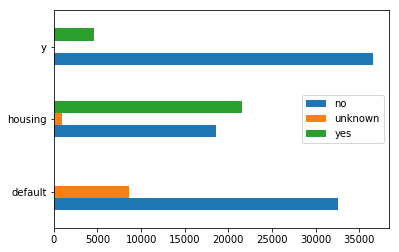

In [19]:
cnt.T.plot(kind='barh')

▲ 程序清单 9.49 多列的 Series.value_counts 方法和 plot 方法（kind='barh'）

In [20]:
df['age'].describe()

count    41168.000000
mean        40.024436
std         10.420507
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

▲ 程序清单 9.50 DataFrame 对象的 describe 方法

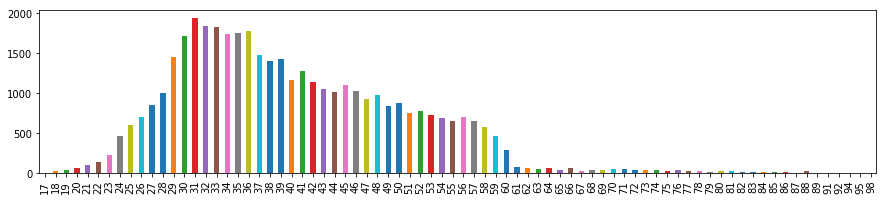

In [21]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(15,3))

▲ 程序清单 9.51 value_counts 方法和 plot 方法（kind='bar'）

In [0]:
def success_rate(col):
    grouped = df.groupby([col, 'y'])
    cnt = grouped['y'].count()
    cnt.name = 'count'
    cnt = cnt.reset_index()
    cnt = cnt.pivot(index=col, columns='y', values='count')
    cnt['per'] = round(cnt['yes'] / cnt.sum(axis=1) * 100, 2)
    return cnt.sort_values(by='per', ascending=False)

▲ 程序清单 9.52 success_rate 函数的定义

In [23]:
success_rate('education')

y,no,yes,per
education,,,
illiterate,14,4,22.22
unknown,1479,251,14.51
university.degree,10493,1669,13.72
professional.course,4643,595,11.36
high.school,8480,1031,10.84
basic.4y,3747,428,10.25
basic.6y,2103,188,8.21
basic.9y,5570,473,7.83


▲ 程序清单 9.53 列 education 的活动成功与否确认

In [24]:
success_rate('job')

y,no,yes,per
job,,,
student,600,275,31.43
retired,1284,434,25.26
unemployed,870,144,14.20
admin.,9067,1351,12.97
management,2596,328,11.22
unknown,293,37,11.21
technician,6006,730,10.84
self-employed,1271,149,10.49
housemaid,954,106,10.00


▲ 程序清单 9.54 列 job 的活动成功与否确认

In [25]:
success_rate('marital')

y,no,yes,per
marital,,,
unknown,68,12,15.00
single,9940,1620,14.01
divorced,4135,476,10.32
married,22386,2531,10.16


▲程序清单 9.55 列 marital 的活动成功与否确认

In [26]:
df['contact'].value_counts(dropna=False)

cellular     26127
telephone    15041
Name: contact, dtype: int64

▲ 程序清单 9.56 Series 对象的 value_counts 方法

In [27]:
df[['duration', 'campaign']].describe()

,duration,campaign
count,41168.000000,41168.000000
mean,258.335941,2.568135
std,259.324728,2.770520
min,0.000000,1.000000
25%,102.000000,1.000000
50%,180.000000,2.000000
75%,319.000000,3.000000
max,4918.000000,56.000000


▲ 程序清单 9.57 DataFrame 对象的 describe 方法

In [28]:
df[df['duration'] > 4000]

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,y
22192,52,blue-collar,married,basic.4y,no,no,telephone,aug,thu,4199,3,yes
24091,33,technician,single,professional.course,no,yes,telephone,nov,mon,4918,1,no


▲ 程序清单 9.58 基于列 duration 的值的索引引用

In [29]:
df['duration_bins'] = pd.cut(df['duration'], 5)
df['duration_bins'].value_counts()

(-4.918, 983.6]     40158
(983.6, 1967.2]       943
(1967.2, 2950.8]       52
(2950.8, 3934.4]       13
(3934.4, 4918.0]        2
Name: duration_bins, dtype: int64

▲ 程序清单 9.59 cut 函数和 value_counts 方法

In [30]:
grouped = df.groupby(['duration_bins','y'])[['y']].size()
grouped

duration_bins     y  
(-4.918, 983.6]   no     36117
                  yes     4041
(983.6, 1967.2]   no       388
                  yes      555
(1967.2, 2950.8]  no        15
                  yes       37
(2950.8, 3934.4]  no         8
                  yes        5
(3934.4, 4918.0]  no         1
                  yes        1
dtype: int64

▲ 程序清单 9.60 groupby 方法和 size 方法

In [31]:
grouped.reset_index().pivot(index='duration_bins', columns='y', values=0)

y,no,yes
duration_bins,,
"(-4.918, 983.6]",36117,4041
"(983.6, 1967.2]",388,555
"(1967.2, 2950.8]",15,37
"(2950.8, 3934.4]",8,5
"(3934.4, 4918.0]",1,1


▲ 程序清单 9.61 reset_index 方法和 pivot 方法

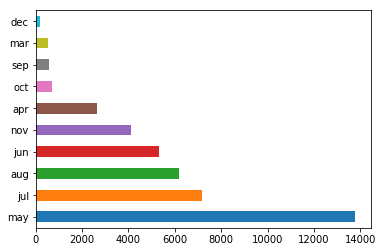

In [32]:
df['month'].value_counts().plot(kind='barh')

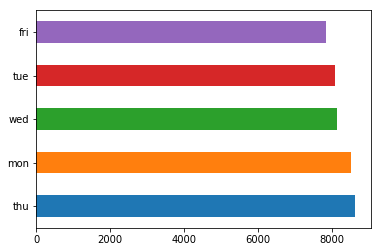

In [33]:
df['day_of_week'].value_counts().plot(kind='barh')

▲ 程序清单 9.62 value_counts 方法和 plot 方法（kind='barh'）

In [34]:
success_rate('month')

y,no,yes,per
month,,,
mar,270,276,50.55
dec,93,89,48.90
sep,314,256,44.91
oct,402,315,43.93
apr,2092,539,20.49
aug,5518,655,10.61
jun,4759,559,10.51
nov,3683,416,10.15
jul,6521,648,9.04


▲ 程序清单 9.63 列 month 的活动成功与否

In [35]:
success_rate('day_of_week')

y,no,yes,per
day_of_week,,,
thu,7572,1044,12.12
tue,7131,953,11.79
wed,7182,949,11.67
fri,6980,846,10.81
mon,7664,847,9.95


▲ 程序清单 9.64 列 day_of_week 的活动成功与否